# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, fill_missing

# Load the data
df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for missing data
def visualize_missing_data(missing_counts):
    """
    Create a bar chart of missing values by column.
    
    Args:
        missing_counts: pandas Series with missing value counts per column
    """
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column


Missing Value Counts:
patient_id               0
age                    200
sex                      0
bmi                    438
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total      554
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
dtype: int64

Missing Value Percentages (%):
patient_id             0.00
age                    2.00
sex                    0.00
bmi                    4.38
enrollment_date        0.00
systolic_bp            4.14
diastolic_bp           4.14
cholesterol_total      5.54
cholesterol_hdl        5.54
cholesterol_ldl        5.54
glucose_fasting        3.69
site                   0.00
intervention_group     0.00
follow_up_months       0.00
adverse_events         0.00
outcome_cvd            0.0

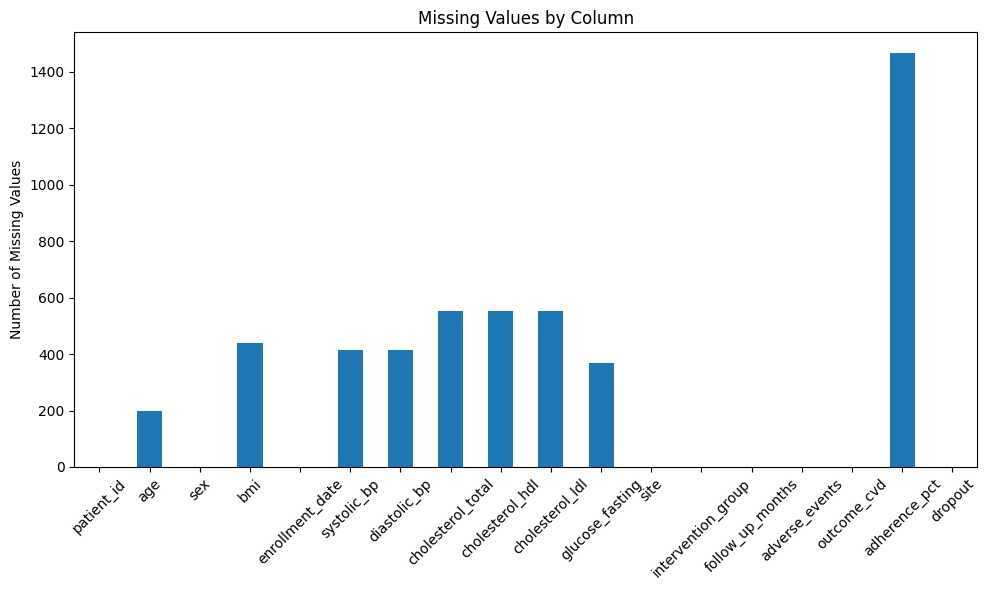

In [ ]:
# TODO: Detect and analyze missing data
# First, clean the data (convert sentinel values to NaN)
df_clean = df.replace(-999, pd.NA).drop_duplicates()
missing_counts = detect_missing(df_clean)
# Now analyze missing data on the cleaned dataset
missing_counts = detect_missing(df_clean)
missing_percent = (missing_counts / len(df_clean)) * 100

print("\nMissing Value Counts:")
print(missing_counts)
print("\nMissing Value Percentages (%):")
print(missing_percent.round(2))

# Identify columns with missing data
columns_with_missing = missing_counts[missing_counts > 0].index.tolist()
print("\nColumns with missing data:", columns_with_missing)

# Create visualization
visualize_missing_data(missing_counts)

## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [ ]:
# TODO: Compare imputation strategies
fill_mean = fill_missing(df, 'cholesterol_total',strategy='mean')
fill_median = fill_missing(df, 'cholesterol_total',strategy='median')
forward_fill = fill_missing(df, 'cholesterol_total',strategy='ffill')
original_missing = df['cholesterol_total'].isna().sum()
table = pd.DataFrame({
    "strategy": ['Original', 'mean', 'median', 'forward_fill'],
    'Mean': [df['cholesterol_total'].mean(),
             fill_mean['cholesterol_total'].mean(),
             fill_median['cholesterol_total'].mean(),
             forward_fill['cholesterol_total'].mean()],
    'Median': [df['cholesterol_total'].median(),
                fill_mean['cholesterol_total'].median(),
                fill_median['cholesterol_total'].median(),
                forward_fill['cholesterol_total'].median()],
    'Value Filled': [0,
                     original_missing - fill_mean['cholesterol_total'].isna().sum(),
                     original_missing - fill_median['cholesterol_total'].isna().sum(),
                     original_missing - forward_fill['cholesterol_total'].isna().sum()]
})
table


0


/Users/zefanhuang/Downloads/217/ds217-midterm-Zefan-Huang/q3_data_utils.py:94: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column] = df[column].fillna(method='ffill')


,strategy,Mean,Median,Value Filled
0,Original,178.039488,178.039488,0
1,mean,178.039488,178.039488,0
2,median,178.039488,178.039488,0
3,forward_fill,178.039488,178.039488,0


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [72]:
# TODO: Drop missing rows with different strategies
drop_any = df.dropna()
rows_remined_any = len(drop_any)

df_drop_specific = df.dropna(subset=['bmi'])
rows_remaining_specific = len(df_drop_specific)

if rows_remaining_specific > rows_remined_any:
    print("Dropping specific columns loses less data (more rows retained).")
else:
    print("Dropping any missing loses less or equal data.")

Dropping specific columns loses less data (more rows retained).


## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

In [104]:
# TODO: Create and save clean dataset

df = df.dropna(subset=['bmi'])
df = fill_missing(df, 'bmi', strategy='median')
df = fill_missing(df, 'systolic_bp', strategy='mean')
df = fill_missing(df, 'diastolic_bp', strategy='mean')
df = fill_missing(df, 'cholesterol_total', strategy='median')
df = fill_missing(df, 'cholesterol_hdl', strategy='median')
df = fill_missing(df, 'cholesterol_ldl', strategy='median')
df = fill_missing(df, 'glucose_fasting', strategy='median')
df = fill_missing(df, 'adherence_pct', strategy='mean')

df = df.dropna(subset=['patient_id', 'age'])

df.to_csv('output/clinical_trial_clean.csv', index=False)
df.isna().sum().to_csv('output/q5_missing_report.txt', header=['MissingCount'])


## Reflection

Which imputation strategy would you recommend for this dataset and why?
Each numeric column was imputed using the most appropriate strategy based on its distribution: median for skewed clinical measures (BMI, cholesterol, glucose) and mean for approximately normal measures (blood pressure, adherence).

**Your answer:**

TODO: Explain your strategy choice
